In [44]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [34]:
from wordcloud import WordCloud

In [184]:
con = mysql.connector.connect(host='localhost', database='Twitter', user='root', 
                              password='2020TwitterProject!!!', charset='utf8')

cursor = con.cursor()
query = "SELECT created_at, tweet FROM `Twitter`.`novel`;"

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns=['date', 'tweet'])

In [188]:
df.head()

,date,tweet
0,Fri Mar 20 16:19:13 +0000 2020,@smeadow @ThePanCook2020 @Vandalay_Inc @Winkle...
1,Fri Mar 20 16:19:13 +0000 2020,"RT @canongatebooks: World, meet Mrs Death.\n ..."
2,Fri Mar 20 16:19:14 +0000 2020,RT @Omojuwa: My other concern about self-isola...
3,Fri Mar 20 16:19:14 +0000 2020,RT @thedailybeast: EXCLUSIVE: Georgia Senator ...
4,Fri Mar 20 16:19:14 +0000 2020,NOW the real #Doomsday #numbers being rolled o...


In [189]:
len(df)

10575

In [167]:
stopword_list = stopwords.words('english')
ps = PorterStemmer()

In [168]:
text = df['tweet']

text = [tweet.lower().replace('https', '') for tweet in text]

words = [tweet.split() for tweet in text]

words = [word for word in words if not word in stopword_list]

words = [' '.join(word) for word in words]

df['clean_tweets'] = words

In [214]:
df.head()

,date,tweet
0,Fri Mar 20 16:19:13 +0000 2020,@smeadow @ThePanCook2020 @Vandalay_Inc @Winkle...
1,Fri Mar 20 16:19:13 +0000 2020,"RT @canongatebooks: World, meet Mrs Death.\n ..."
2,Fri Mar 20 16:19:14 +0000 2020,RT @Omojuwa: My other concern about self-isola...
3,Fri Mar 20 16:19:14 +0000 2020,RT @thedailybeast: EXCLUSIVE: Georgia Senator ...
4,Fri Mar 20 16:19:14 +0000 2020,NOW the real #Doomsday #numbers being rolled o...


In [216]:
df['dt'] = df.date.apply(time_convert)

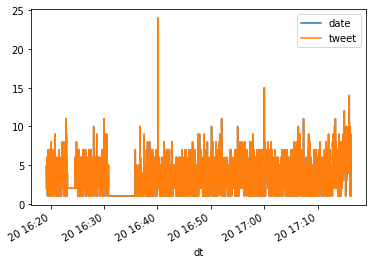

In [223]:
df.groupby('dt').count().plot()

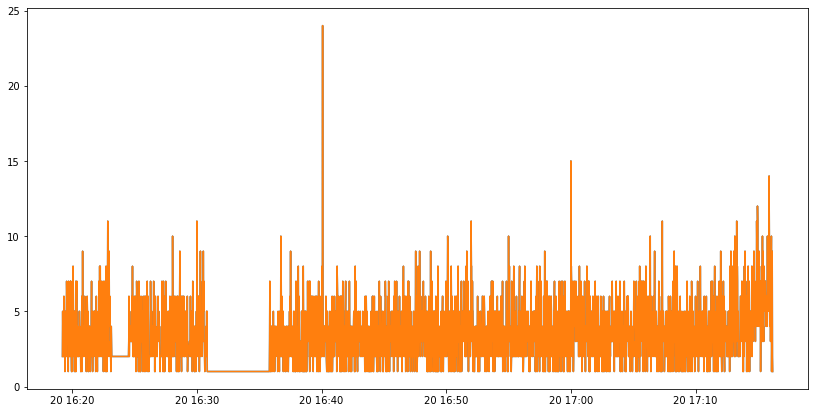

In [230]:
plt.figure(figsize=(14,7))
plt.plot(df.groupby('dt').count())
plt.show()

In [232]:
# The entire dataset covers just under an hour
df.dt.max() - df.dt.min()

Timedelta('0 days 00:56:58')

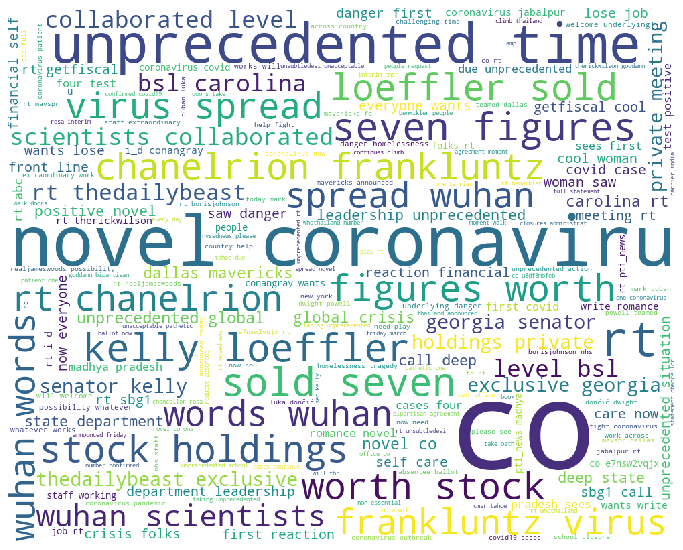

In [175]:
# Creating the word cloud
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800).generate(" ".join(df['clean_tweets']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

In [176]:
query = "SELECT created_at, username, tweet, location FROM `Twitter`.`tweets`;"
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['created_at', 'username', 'tweet', 'location'])

In [177]:
df.head()

,created_at,username,tweet,location
0,Thu Mar 19 20:31:32 +0000 2020,BEVHOWARD40,RT @AlxThomp: The Trump campaign had planned a...,ME
1,Thu Mar 19 20:31:32 +0000 2020,mnykodym,RT @LSUBarstool: Can’t wait to see how the Ref...,"Las Vegas, NV"
2,Thu Mar 19 20:31:32 +0000 2020,mgbarksby,"RT @doctor_oxford: Please, guys, help us to he...",Nottinghamshire
3,Thu Mar 19 20:31:32 +0000 2020,JymEE_,To each and every person celebrating this news...,"Far From Home, WY"
4,Thu Mar 19 20:31:32 +0000 2020,CharIotteHall,RT @jordanBhall: So I'm not the only one resor...,"England, United Kingdom"


In [178]:
len(df)

2396539

In [108]:
def clean_tweet(tweet):
    """
    Prep text for word cloud
    """
    text = [t.lower().replace('https', '').split() for t in tweet]
    words = [' '.join(word) for word in text]
    return words

In [109]:
df['clean_tweet'] = clean_tweet(df['tweet'])

In [110]:
df.head()

,created_at,username,tweet,location,clean_tweet
0,Thu Mar 19 20:31:32 +0000 2020,BEVHOWARD40,RT @AlxThomp: The Trump campaign had planned a...,ME,rt @alxthomp: the trump campaign had planned a...
1,Thu Mar 19 20:31:32 +0000 2020,mnykodym,RT @LSUBarstool: Can’t wait to see how the Ref...,"Las Vegas, NV",rt @lsubarstool: can’t wait to see how the ref...
2,Thu Mar 19 20:31:32 +0000 2020,mgbarksby,"RT @doctor_oxford: Please, guys, help us to he...",Nottinghamshire,"rt @doctor_oxford: please, guys, help us to he..."
3,Thu Mar 19 20:31:32 +0000 2020,JymEE_,To each and every person celebrating this news...,"Far From Home, WY",to each and every person celebrating this news...
4,Thu Mar 19 20:31:32 +0000 2020,CharIotteHall,RT @jordanBhall: So I'm not the only one resor...,"England, United Kingdom",rt @jordanbhall: so i'm not the only one resor...


In [250]:
def word_cloud(data):
    """ word cloud of text"""
    # Creating the word cloud
    plt.figure(figsize=(12,10))
    wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800).generate(" ".join(df['clean_tweets']))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show(wordcloud)

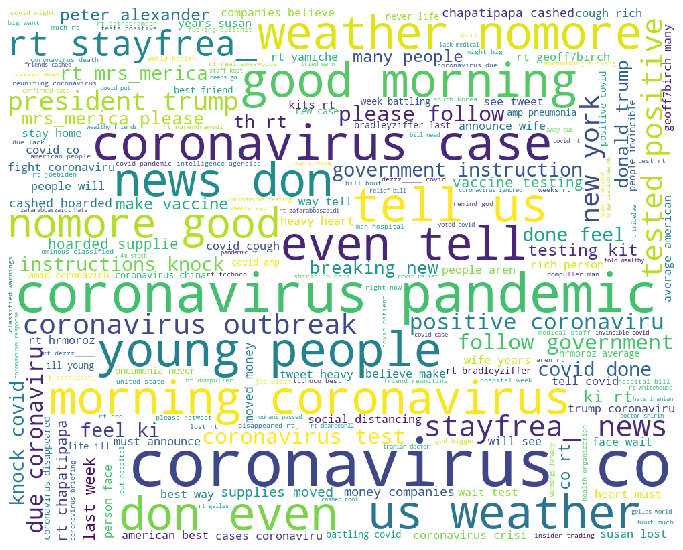

In [114]:
word_cloud(df)

In [117]:
df.nunique()

created_at       51700
username       1280749
tweet           619224
location        250148
clean_tweet     618142
dtype: int64

In [118]:
1280749/len(df)

0.53441608920197

In [190]:
# df.head(50)

In [120]:
df.tail()

,created_at,username,tweet,location,clean_tweet
2396534,Sat Mar 21 16:57:19 +0000 2020,j2lm4u,RT @thedailybeast: Half of all coronavirus cas...,None,rt @thedailybeast: half of all coronavirus cas...
2396535,Sat Mar 21 16:57:19 +0000 2020,Sanjaypanda9,RT @cricketaakash: Worrying sight. Most don’t ...,Odisha,rt @cricketaakash: worrying sight. most don’t ...
2396536,Sat Mar 21 16:57:19 +0000 2020,IMarkhorI,RT @RanaBilalahme20: @Superrrr_Novaaa @Farooqu...,None,rt @ranabilalahme20: @superrrr_novaaa @farooqu...
2396537,Sat Mar 21 16:57:19 +0000 2020,DahPylos,RT @brfootball: Robert Lewandowski and his wif...,"Lagos, Nigeria",rt @brfootball: robert lewandowski and his wif...
2396538,Sat Mar 21 16:57:19 +0000 2020,_DF42,"RT @emedtox: It Italy, medical professionals h...","NW England, United Kingdom","rt @emedtox: it italy, medical professionals h..."


In [121]:
df.location.value_counts()

United States                44537
California, USA              19684
India                        16421
Los Angeles, CA              15255
USA                          14948
                             ...  
Hewlêr                           1
Palm Beach County, FL USA        1
portland/eugene                  1
raincouver☔️                     1
Irvine, CA                       1
Name: location, Length: 250148, dtype: int64

In [127]:
locations = df.drop_duplicates()

In [128]:
len(locations)

2396073

In [130]:
locations = locations.dropna()

In [131]:
len(locations)

1604391

In [132]:
locations['location'].apply(sum(locations['location'].str.contains('TX')))

TypeError: 'int' object is not callable

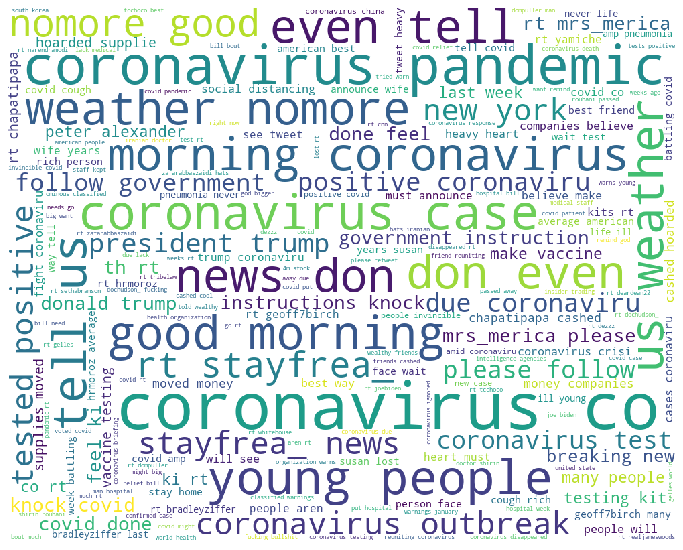

In [133]:
word_cloud(locations)

In [148]:
locations['lower'] = [location.lower() for location in locations.location]

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
locations.head()

,created_at,username,tweet,location,clean_tweet,lower
0,Thu Mar 19 20:31:32 +0000 2020,BEVHOWARD40,RT @AlxThomp: The Trump campaign had planned a...,ME,rt @alxthomp: the trump campaign had planned a...,me
1,Thu Mar 19 20:31:32 +0000 2020,mnykodym,RT @LSUBarstool: Can’t wait to see how the Ref...,"Las Vegas, NV",rt @lsubarstool: can’t wait to see how the ref...,"las vegas, nv"
2,Thu Mar 19 20:31:32 +0000 2020,mgbarksby,"RT @doctor_oxford: Please, guys, help us to he...",Nottinghamshire,"rt @doctor_oxford: please, guys, help us to he...",nottinghamshire
3,Thu Mar 19 20:31:32 +0000 2020,JymEE_,To each and every person celebrating this news...,"Far From Home, WY",to each and every person celebrating this news...,"far from home, wy"
4,Thu Mar 19 20:31:32 +0000 2020,CharIotteHall,RT @jordanBhall: So I'm not the only one resor...,"England, United Kingdom",rt @jordanbhall: so i'm not the only one resor...,"england, united kingdom"


In [156]:
tx = sum('tx' in location for location in locations.lower)

In [158]:
# How many times 'Texas' appears
texas = tx + sum('texas' in location for location in locations.lower)

In [159]:
texas/len(locations)

0.04096569975772739

In [160]:
texas

65725

In [161]:
sum('austin' in location for location in locations.lower)

6145

In [191]:
locations.nunique()

created_at      51700
username       861601
tweet          467266
location       250148
clean_tweet    466518
lower          232939
dtype: int64

In [194]:
locations.created_at.dtype

dtype('O')

In [195]:
type(locations.created_at)

pandas.core.series.Series

In [196]:
locations.created_at.head()

0    Thu Mar 19 20:31:32 +0000 2020
1    Thu Mar 19 20:31:32 +0000 2020
2    Thu Mar 19 20:31:32 +0000 2020
3    Thu Mar 19 20:31:32 +0000 2020
4    Thu Mar 19 20:31:32 +0000 2020
Name: created_at, dtype: object

In [197]:
first_time = locations.created_at[0]

In [198]:
first_time

'Thu Mar 19 20:31:32 +0000 2020'

In [199]:
import datetime

In [200]:
dt = datetime.datetime.strptime(first_time, '%a %b %d %H:%M:%S +%f %Y')

In [201]:
dt

datetime.datetime(2020, 3, 19, 20, 31, 32)

In [202]:
def time_convert(string):
    return datetime.datetime.strptime(string, '%a %b %d %H:%M:%S +%f %Y')

In [203]:
locations['dt'] = locations.created_at.apply(time_convert)

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [205]:
locations.dt.head()

0   2020-03-19 20:31:32
1   2020-03-19 20:31:32
2   2020-03-19 20:31:32
3   2020-03-19 20:31:32
4   2020-03-19 20:31:32
Name: dt, dtype: datetime64[ns]

In [ ]:
plt.figure(figsize=(12,10))
plt.hist()

In [207]:
locations.tail()

,created_at,username,tweet,location,clean_tweet,lower,dt
2396531,Sat Mar 21 16:57:19 +0000 2020,AkaManami,RT @mrs_merica: Can y’all please just follow t...,"Montevideo, Uruguay",rt @mrs_merica: can y’all please just follow t...,"montevideo, uruguay",2020-03-21 16:57:19
2396532,Sat Mar 21 16:57:19 +0000 2020,TheEdiblesClub,RT @MichaelCoudrey: NEW DATA: A French study h...,Disinfecting Our Kitchens,rt @michaelcoudrey: new data: a french study h...,disinfecting our kitchens,2020-03-21 16:57:19
2396535,Sat Mar 21 16:57:19 +0000 2020,Sanjaypanda9,RT @cricketaakash: Worrying sight. Most don’t ...,Odisha,rt @cricketaakash: worrying sight. most don’t ...,odisha,2020-03-21 16:57:19
2396537,Sat Mar 21 16:57:19 +0000 2020,DahPylos,RT @brfootball: Robert Lewandowski and his wif...,"Lagos, Nigeria",rt @brfootball: robert lewandowski and his wif...,"lagos, nigeria",2020-03-21 16:57:19
2396538,Sat Mar 21 16:57:19 +0000 2020,_DF42,"RT @emedtox: It Italy, medical professionals h...","NW England, United Kingdom","rt @emedtox: it italy, medical professionals h...","nw england, united kingdom",2020-03-21 16:57:19


In [209]:
locations.dt.min()

Timestamp('2020-03-19 20:31:32')

In [210]:
locations.dt.max()

Timestamp('2020-03-21 16:57:19')

In [226]:
time_count = locations.groupby('dt').count()

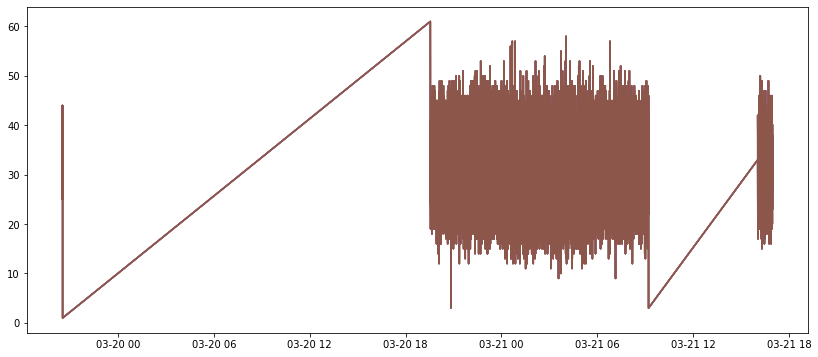

In [229]:
plt.figure(figsize=(14,6))
plt.plot(time_count)
plt.show()

In [234]:
locations.lower.count()

1604391

In [235]:
locations.lower.nunique()

232939

In [240]:
locations.lower.max()

'￣\\_/\\/\\_♡_/\\_/\\_____'

In [241]:
locations.lower.min()

'\t10號 shamchun st'

In [242]:
locations.dt.max() - locations.dt.min()

Timedelta('1 days 20:25:47')

In [244]:
con = mysql.connector.connect(host='localhost', database='Twitter', user='root', 
                              password='2020TwitterProject!!!', charset='utf8')
cursor = con.cursor()
query = "SELECT created_at, tweet FROM `Twitter`.`novel`;"

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns=['date', 'tweet'])

In [247]:
len(df['tweet'])

176967

In [248]:
text = df['tweet']

text = [tweet.lower().replace('https', '') for tweet in text]

words = [tweet.split() for tweet in text]

words = [word for word in words if not word in stopword_list]

words = [' '.join(word) for word in words]

df['clean_tweets'] = words

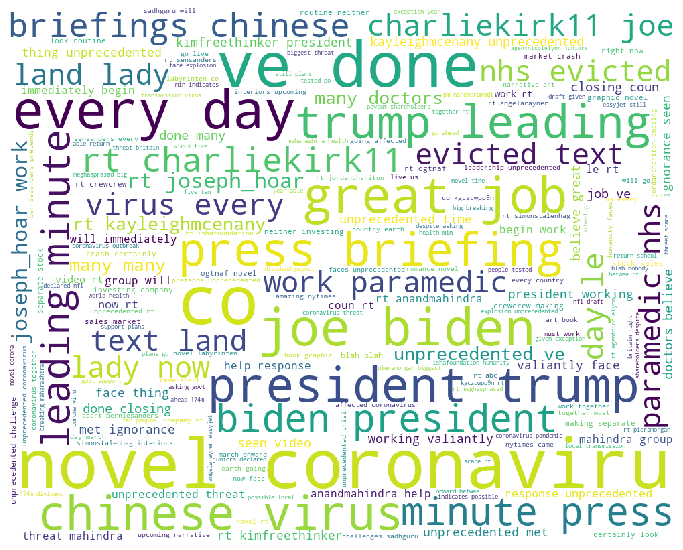

In [251]:
word_cloud(df)

In [269]:
con = mysql.connector.connect(host='localhost', database='Twitter', user='root', 
                              password='2020TwitterProject!!!', charset='utf8')

cursor = con.cursor()
query = "SELECT created_at, username, tweet, location, followers_count FROM `Twitter`.`tweets`;"

cursor.execute(query)

data = cursor.fetchall()

df2 = pd.DataFrame(data, columns=['date', 'username', 'tweet', 'location', 'followers_count'])

In [270]:
len(df2)

5992116

In [271]:
df3 = df2['tweet']

In [272]:
len(df3)

5992116

In [273]:
df3 = df3.drop_duplicates()

In [274]:
len(df3)

1423526

In [275]:
text = df3

text = [tweet.lower().replace('https', '') for tweet in text]

words = [tweet.split() for tweet in text]

words = [word for word in words if not word in stopword_list]

words = [' '.join(word) for word in words]

df3['clean_tweets'] = words

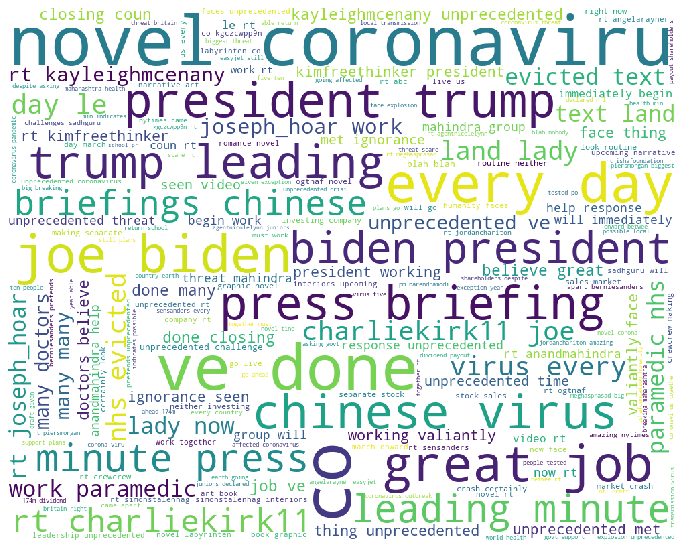

In [280]:
word_cloud(df3)

In [279]:
# Proportion of tweets that are retweets
1 - len(df3)/len(df2)

0.7624333374053507

In [281]:
blob = TextBlob(df3[0])

In [282]:
blob

TextBlob("RT @AlxThomp: The Trump campaign had planned a Biden onslaught aimed at crippling his underfunded campaign before he could unify the Democr…")

In [288]:
blob.sentiment_assessments

Sentiment(polarity=0.0, subjectivity=0.0, assessments=[])

In [296]:
def blob(tweet):
    """
    Returns a TextBlob object
    """
    return TextBlob(tweet)

In [301]:
# df3['clean_tweets']

In [302]:
blob = [blob(tweet) for tweet in df3['clean_tweets']]

In [303]:
def polarity(blob):
    """
    Measure of tweet polarity
    """
    if blob.sentiment.polarity > 0:
        return 1
    elif blob.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [304]:
def ngrams(blob):
    """
    Returns n-grams of n = 3 words from each tweet
    """
    return blob.ngrams()

In [305]:
polarity = [polarity(tweet) for tweet in blob]

In [ ]:
ngrams = [ngrams(tweet) for tweet in blob]

In [306]:
df_blob = pd.DataFrame()
df_blob['tweet'] = df3['clean_tweets']
df_blob['polarity'] = polarity
df_blob['ngrams'] = ngrams
df_blob.head()

,tweet,polarity,ngrams
0,rt @alxthomp: the trump campaign had planned a...,0,<function ngrams at 0x12b2a8488>
1,rt @lsubarstool: can’t wait to see how the ref...,1,<function ngrams at 0x12b2a8488>
2,"rt @doctor_oxford: please, guys, help us to he...",0,<function ngrams at 0x12b2a8488>
3,to each and every person celebrating this news...,-1,<function ngrams at 0x12b2a8488>
4,rt @jordanbhall: so i'm not the only one resor...,-1,<function ngrams at 0x12b2a8488>


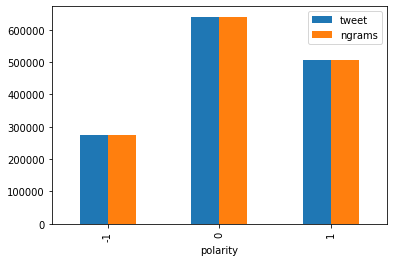

In [308]:
df_blob.groupby('polarity').count().plot(kind='bar')

In [316]:
unique_tweets = df2['tweet'].drop_duplicates()

In [317]:
len(unique_tweets)

1423526

In [318]:
tweets_text = ' '.join(tweet for tweet in unique_tweets)

In [319]:
tweets_text[:300]

"RT @AlxThomp: The Trump campaign had planned a Biden onslaught aimed at crippling his underfunded campaign before he could unify the Democr… RT @LSUBarstool: Can’t wait to see how the Refs did this one am I right RT @doctor_oxford: Please, guys, help us to help you.\n\nPlease don't ignore the advice t"

In [320]:
df2_clean = df

,date,username,tweet,location,followers_count
0,Thu Mar 19 20:31:32 +0000 2020,BEVHOWARD40,RT @AlxThomp: The Trump campaign had planned a...,ME,21530
1,Thu Mar 19 20:31:32 +0000 2020,mnykodym,RT @LSUBarstool: Can’t wait to see how the Ref...,"Las Vegas, NV",48
2,Thu Mar 19 20:31:32 +0000 2020,mgbarksby,"RT @doctor_oxford: Please, guys, help us to he...",Nottinghamshire,148
3,Thu Mar 19 20:31:32 +0000 2020,JymEE_,To each and every person celebrating this news...,"Far From Home, WY",579
4,Thu Mar 19 20:31:32 +0000 2020,CharIotteHall,RT @jordanBhall: So I'm not the only one resor...,"England, United Kingdom",357


In [321]:
len(tweets_text)

160552123

In [323]:
len(df2)

5992116

In [324]:
df2.to_csv('first_six_million.csv', index=False)

In [325]:
# Getting novel tweets as of 11:40 am 3/22 for csv
con = mysql.connector.connect(host='localhost', database='Twitter', user='root', 
                              password='2020TwitterProject!!!', charset='utf8')
cursor = con.cursor()
query = "SELECT created_at, username, tweet, location, followers_count FROM `Twitter`.`novel`;"

cursor.execute(query)

data = cursor.fetchall()

novel_df = pd.DataFrame(data, columns=['date', 'username', 'tweet', 'location', 'followers_count'])

In [326]:
len(novel_df)

211470

In [327]:
novel_df.head()

,date,username,tweet,location,followers_count
0,Fri Mar 20 16:19:13 +0000 2020,protoutopiancr1,@smeadow @ThePanCook2020 @Vandalay_Inc @Winkle...,None,235
1,Fri Mar 20 16:19:13 +0000 2020,JanetEmson,"RT @canongatebooks: World, meet Mrs Death.\n ...",Yorkshire,10616
2,Fri Mar 20 16:19:14 +0000 2020,Times_Of_Caleb,RT @Omojuwa: My other concern about self-isola...,"Lagos, Nigeria",1759
3,Fri Mar 20 16:19:14 +0000 2020,PaulSang86,RT @thedailybeast: EXCLUSIVE: Georgia Senator ...,"Toronto, Canada",684
4,Fri Mar 20 16:19:14 +0000 2020,GETAnalysis,NOW the real #Doomsday #numbers being rolled o...,Global,1545


In [328]:
novel_df.to_csv('novel.csv', index=False)